# Objective

**Day 7 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 7. physical**

Used Dataset: https://www.ncei.noaa.gov/access/data/global-ocean-currents-database/hfportal.html?
    

# Setup

In [66]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Read Data

In [67]:
#ds = xr.open_dataset('/home/frauke/30DayChartChallenge/data/oceancurrents/gocd_a0151726_prvi-6km_2016-04-30-2100.nc')
ds = xr.open_dataset('/home/frauke/30DayChartChallenge/data/oceancurrents/selection.nc')

In [68]:
ds.longitude

<xarray.DataArray 'longitude' (longitude: 18)>
array([-67.991699, -67.935959, -67.880219, -67.824478, -67.768738, -67.712997,
       -67.657257, -67.601517, -67.545776, -67.490044, -67.434303, -67.378563,
       -67.322823, -67.267082, -67.211342, -67.155602, -67.099861, -67.044121])
Coordinates:
  * longitude  (longitude) float64 -67.99 -67.94 -67.88 ... -67.16 -67.1 -67.04
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

# Plot

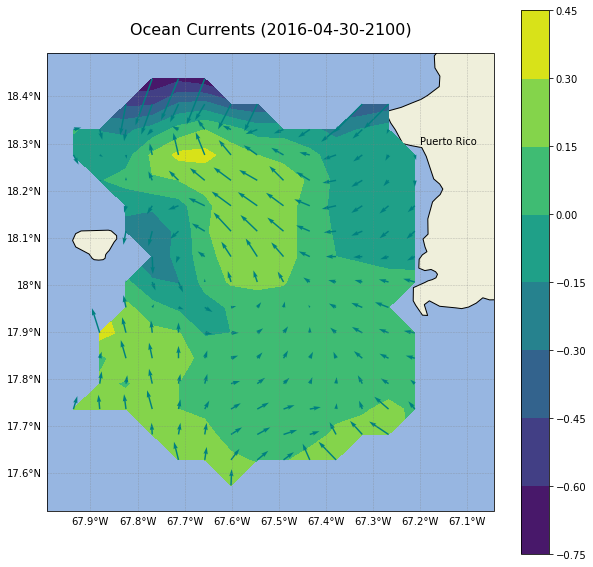

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.5,
             linewidth=0.5, color='gray', 
             xlocs=np.arange(-180,180,.1), ylocs=np.arange(-90,90,.1))
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_title('Ocean Currents (2016-04-30-2100)', fontsize=16, pad=20)
c = ax.contourf(ds.longitude, ds.latitude, ds.v, color=cmap)
plt.colorbar(c)
ax.quiver(ds.longitude, ds.latitude, ds.u, ds.v, color='Teal', 
         transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.text(x=-67.2,y=18.3, s="Puerto Rico");
plt.savefig('../plots/day07_physical', bbox_inches='tight', dpi=100)